## Imports

In [5]:
import skimage
from skimage import io
from skimage import color
import random
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

## 2a. Load Image

In [6]:
#load image with skimage and convert to grayscale
monaLisa = skimage.io.imread("monaLisa.jpg")
grayScaleMonaLisa = color.rgb2gray(monaLisa)

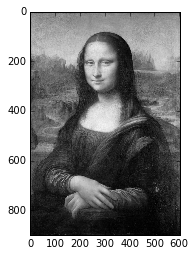

In [7]:
plt.imshow(grayScaleMonaLisa, cmap = cm.Greys_r)
plt.show()

## 2b. Preprocessing the input

In [8]:
#the image has about 900 rows and 604 columns

def preProcessing(image):
    sampleData = []
    labels = []
    i =0
    while i < 5000:
        row = random.randint(0,899) # get 899 and 603 from image - Francesco
        col = random.randint(0,603)
        
        sampleData.append(image[row][col])
        labels.append([row,col])
        i+=1
        
    return sampleData,labels

In [9]:
sample,labels = preProcessing(grayScaleMonaLisa)

### 2c. Preprocess the output

No preprocessing needs to be done on the output as the input is already in grayscale format

## 2d. Rescale pixel

In [10]:
def rescalePixel(image):
    zeroOne = np.zeros((900,604))
    
    for i in range(900):
        for j in range(604):
            zeroOne[i][j] = float(image[i][j])/255
    return zeroOne

In [11]:
rescaledImage = rescalePixel(grayScaleMonaLisa)

In [12]:
print rescaledImage[:100]

[[ 0.00173471  0.00153356  0.00166642 ...,  0.00143352  0.00174208
   0.00145534]
 [ 0.00173024  0.00169388  0.0016312  ...,  0.00108638  0.00128624
   0.00095774]
 [ 0.00137102  0.00164001  0.00161687 ...,  0.00114678  0.00121702
   0.00075338]
 ..., 
 [ 0.00183165  0.001902    0.00196142 ...,  0.00187802  0.0018287
   0.00127273]
 [ 0.00200414  0.00174165  0.00176809 ...,  0.00187238  0.00181875
   0.0012793 ]
 [ 0.00198993  0.00162968  0.00167588 ...,  0.00185916  0.00191534
   0.00141102]]


## 2e. Further preprocessing

No further preprocessing is needed

## 2f. Run Random Forest and show results

In [33]:
def randomForest(img,data,labels,estimators,depth = None):
    est = RandomForestRegressor(n_estimators=estimators,max_depth = depth)
    est = est.fit(labels,data)
    
    predictions = []
    for i in range(900):
        for j in range(604):
            predictions.append([i,j])
    
    predicted = est.predict(predictions)
    predictedImage = predicted.reshape(900,604)
    plt.imshow(predictedImage, cmap=cm.gray)
    

In [34]:
len(sample)

5000

In [35]:
len(labels)

5000

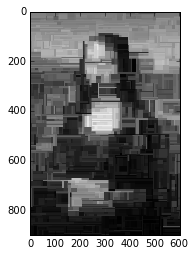

In [36]:
randomForest(grayScaleMonaLisa,sample,labels,1)

## 2g. Experimentation

### 2g.a  Run random forests with single estimator but with depth ( 1,2,3,5,10,15)

####  Depth = 1

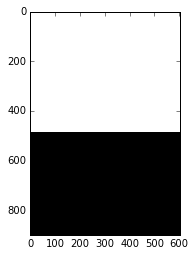

In [37]:
randomForest(grayScaleMonaLisa,sample,labels,1,1)

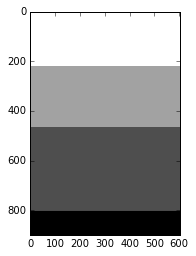

In [38]:
randomForest(grayScaleMonaLisa,sample,labels,1,2)

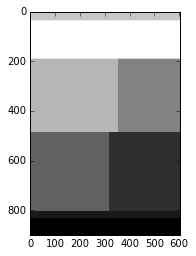

In [39]:
randomForest(grayScaleMonaLisa,sample,labels,1,3)

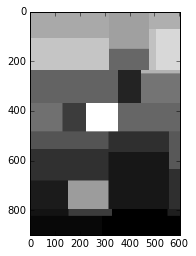

In [40]:
randomForest(grayScaleMonaLisa,sample,labels,1,5)

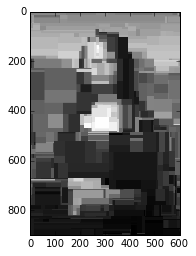

In [41]:
randomForest(grayScaleMonaLisa,sample,labels,1,10)

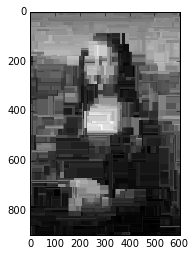

In [42]:
randomForest(grayScaleMonaLisa,sample,labels,1,15)

### 2g.a Run random forests with  a depth of 7 but different number of estimators/trees ( 1,3,5,10,100)

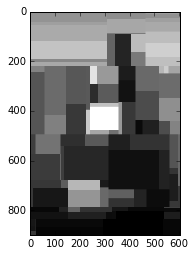

In [48]:
randomForest(grayScaleMonaLisa,sample,labels,1,7)

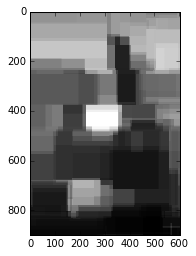

In [49]:
randomForest(grayScaleMonaLisa,sample,labels,3,7)

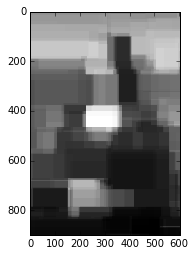

In [50]:
randomForest(grayScaleMonaLisa,sample,labels,5,7)

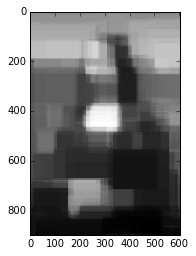

In [51]:
randomForest(grayScaleMonaLisa,sample,labels,10,7)

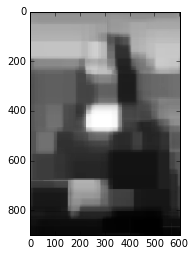

In [53]:
randomForest(grayScaleMonaLisa,sample,labels,100,7)

### 2g.c Repeat experiment with a k-NN regressor with k = 1

In [ ]:
def kNN ( img,sampleData,labels,k):
    reg = KNeighborsRegressor(k)
    reg = reg.fit(labels,sampleData)
    
    predictions = []
    for i in range(900):
        for j in range(604):
            predictions.append([i,j])
    
    predicted = reg.predict(predictions)
    predictedImage = predicted.reshape(900,604)
    plt.imshow(predictedImage, cmap=cm.gray)